# Box Office

Kaggle TMDB Box Office Prediction Competition 2019

Authors: Sean Trinh, Hariharan Vijayachandran

Part 1 - Process the data.

In [1]:
'''
    Process the data.
'''
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [3]:
to_drop = ['id','belongs_to_collection','homepage','imdb_id','original_title','title','original_language','overview','poster_path','status','tagline','Keywords',
          'spoken_languages', 'production_companies','production_countries', 'cast','crew', 'genres']
for x in to_drop:
    train_df = train_df.drop(x,axis=1)
    if x!= 'revenue':
        test_df = test_df.drop(x,axis=1)

In [4]:

# train_df['spoken_languages'] = train_df['spoken_languages'].apply(lambda x: x.count('{') if type(x)==str else 0)
# test_df['spoken_languages'] = test_df['spoken_languages'].apply(lambda x: x.count('{') if type(x)==str else 0)
# train_df['production_companies'] =train_df['production_companies'].apply(lambda x: x.count('{') if type(x)==str else 0)
# test_df['production_companies'] = test_df['production_companies'].apply(lambda x: x.count('{') if type(x)==str else 0)
# train_df['production_countries'] =train_df['production_countries'].apply(lambda x: x.count('{') if type(x)==str else 0)
# test_df ['production_countries']= test_df['production_countries'].apply(lambda x: x.count('{') if type(x)==str else 0)
# train_df['cast'] =train_df['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
# test_df['cast'] = test_df['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
# train_df['crew'] =train_df['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
# test_df['crew'] = test_df['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
# train_df['genres'] =train_df['genres'].apply(lambda x: x.count('{') if type(x)==str else 0)
# test_df ['genres']= test_df['genres'].apply(lambda x: x.count('{') if type(x)==str else 0)
# train_df['release_month'] = train_df['release_date'].apply(lambda x:int(x.split('/')[0]) if type(x)==str else 0 )
# train_df['release_year'] = train_df['release_date'].apply(lambda x:int(x.split('/')[2])if type(x)==str else 0 )
# train_df['release_date'] = train_df['release_date'].apply(lambda x:int(x.split('/')[1])if type(x)==str else 0 )
# test_df['release_month'] = train_df['release_date'].apply(lambda x:int(x.split('/')[0])if type(x)==str else 0 )
# test_df['release_year'] = train_df['release_date'].apply(lambda x:int(x.split('/')[2]) if type(x)==str else 0)
# test_df['release_date'] = train_df['release_date'].apply(lambda x:int(x.split('/')[1])if type(x)==str else 0 )
def ap(x):
    if type(x) == str:
        x = int(x.split('/')[2])
        if x<=19:
            return 2000+x
        else:
            return 1900+x
    else:
        return 0

train_df['release_year'] = train_df['release_date'].apply(ap)
test_df['release_year'] = train_df['release_date'].apply(ap)
train_df.drop('release_date',axis = 1, inplace = True)
test_df.drop('release_date',axis = 1, inplace = True)


In [5]:
train_df.head()
test_df.head()

,budget,popularity,runtime,release_year
0,0,3.851534,90.0,2015.0
1,88000,3.559789,65.0,2004.0
2,0,8.085194,100.0,2014.0
3,6800000,8.596012,130.0,2012.0
4,2000000,3.217680,92.0,2009.0


In [6]:
train=train_df.sample(frac=0.9,random_state=200)
test=train_df.drop(train.index)

In [7]:
print(len(train))

print(len(test))

train_df.info()

2700
300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
budget          3000 non-null int64
popularity      3000 non-null float64
runtime         2998 non-null float64
revenue         3000 non-null int64
release_year    3000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 117.3 KB


In [8]:
import numpy as np
train['budget'] = train['budget'].apply(np.log)
train['revenue'] = train['revenue'].apply(np.log)
def f(x):
    if x<0:
        return 0
    return x
train = train.applymap(f)
train = train.fillna(0)
X = train.drop('revenue',axis = 1)
Y = train['revenue']

test = test.apply(np.log)
test = test.applymap(f)
test = test.fillna(0)
X_test =test.drop('revenue',axis = 1)
Y_test = test['revenue']

train.head()

,budget,popularity,runtime,revenue,release_year
2585,0.000000,5.244560,83.0,14.156419,2011
2611,0.000000,16.759454,107.0,18.251453,1989
219,14.771022,2.203949,105.0,14.967980,2004
2204,17.504390,10.829432,109.0,17.153756,2009
251,18.400478,7.284477,119.0,16.119826,1995


In [9]:
from keras import models, layers, regularizers, optimizers
model=models.Sequential()
model.add(layers.Dense(356, activation='relu', input_shape=(X.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse'
,metrics=['mean_squared_logarithmic_error'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 356)               1780      
_________________________________________________________________
dropout_1 (Dropout)          (None, 356)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               91392     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 95,753
Trainable params: 95,753
Non-trainable params: 0
_________________

In [10]:
history=model.fit(X,Y,epochs=40,batch_size = 32, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2700 samples, validate on 300 samples
Epoch 1/40
2700/2700 [==============================] - 0s 145us/step - loss: 53790.3886 - mean_squared_logarithmic_error: 6.4431 - val_loss: 237.3767 - val_mean_squared_logarithmic_error: 5.1805
Epoch 2/40
2700/2700 [==============================] - 0s 56us/step - loss: 5898.6197 - mean_squared_logarithmic_error: 4.5115 - val_loss: 245.0228 - val_mean_squared_logarithmic_error: 5.6116
Epoch 3/40
2700/2700 [==============================] - 0s 56us/step - loss: 4190.5281 - mean_squared_logarithmic_error: 4.3678 - val_loss: 244.1733 - val_mean_squared_logarithmic_error: 5.6296
Epoch 4/40
2700/2700 [==============================] - 0s 58us/step - loss: 3169.0146 - mean_squared_logarithmic_error: 4.0114 - val_loss: 243.8102 - val_mean_squared_logarithmic_error: 5.6253
Epoch 5/40
2700/2700 [==============================] - 0s 59us/step - loss: 2698.6439 - mean_squared_logarithmic_error: 3.9463

EVALUATE AND GRAPH

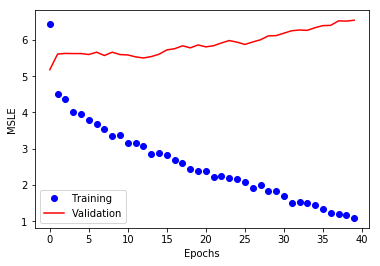

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['mean_squared_logarithmic_error']
val_acc = history.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

In [25]:


test_df['budget'] = test_df['budget'].apply(np.log)
test_df = test_df.applymap(f)
test_df = test_df.fillna(0)
result = model.predict(test_df)
result = np.exp(result)

output_df = pd.read_csv('./data/test.csv')
to_drop_for_output = to_drop+['budget','runtime','popularity','release_date'] #'spoken_languages','production_companies','production_countries','cast','crew','genres','release_date']
for x in to_drop_for_output:
    if x!= 'revenue'and x!='id':
        output_df.drop(x,axis=1,inplace = True)



output_df['revenue'] = result
output_df.head()
# output_df.to_csv("./submission.csv",index = False)

,id,revenue
0,3001,1627156.125
1,3002,1468819.125
2,3003,1806077.125
3,3004,2455100.750
4,3005,1797094.750


In [26]:
output_df.to_csv("./submission.csv",index = False)

In [1]:
#-------EMBEDDED LAYER MODEL---------------

import pandas as pd

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df.head()



,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [2]:
title_rev = train_df[['title','revenue']]
title_rev.head()

,title,revenue
0,Hot Tub Time Machine 2,12314651
1,The Princess Diaries 2: Royal Engagement,95149435
2,Whiplash,13092000
3,Kahaani,16000000
4,Marine Boy,3923970


In [16]:
#create_dictionary
dictionary = set()
def make_dict(x):
    global dictionary
    x = x.split(" ")
    for i in x:
        dictionary.add(i)

title_rev['title'].apply(make_dict)

def set_to_dict(s):
    s = list(s)
    dictionary = dict()
    for i in range(len(s)):
        dictionary[(s[i])] = i
    return dictionary
dictionary = set_to_dict(dictionary)


In [25]:
import numpy as np
word_vec = []
def create_word_vec(x):
    global word_vec
    global dictionary
    x = x.split(" ")
    vec = [0.0]*50
    for i in range(len(x)):
        if x[i] in dictionary:
            vec[i]=dictionary[x[i]]
    word_vec.append(vec)

title_rev['title'].apply(create_word_vec)
word_vec = np.array(word_vec)




In [27]:
word_vec.shape

(3000, 50)

In [177]:
from keras import models, layers, regularizers, optimizers
model = models.Sequential()
model.add(layers.Embedding(len(dictionary),30, input_length = 50));
model.add(layers.Flatten())
# model.add(layers.Dense(256,activation = 'relu'))
# model.add(layers.Dropout(0.7))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mean_squared_logarithmic_error'
,metrics=['mean_squared_logarithmic_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 50, 30)            109860    
_________________________________________________________________
flatten_27 (Flatten)         (None, 1500)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 128)               192128    
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 65        
Total para

In [178]:
df = pd.DataFrame({"title":list(word_vec)})
df['revenue']  = title_rev['revenue']
df

,title,revenue
0,"[3468.0, 813.0, 1515.0, 1178.0, 2159.0, 0.0, 0...",12314651
1,"[884.0, 2223.0, 7.0, 968.0, 1576.0, 2213.0, 0....",95149435
2,"[632.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",13092000
3,"[1702.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",16000000
4,"[1102.0, 914.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3923970
5,"[396.0, 816.0, 3143.0, 2515.0, 693.0, 3143.0, ...",3261638
6,"[884.0, 3206.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",85446075
7,"[2117.0, 2078.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2586511
8,"[1660.0, 724.0, 111.0, 0.0, 0.0, 0.0, 0.0, 0.0...",34327391
9,"[3124.0, 469.0, 2631.0, 0.0, 0.0, 0.0, 0.0, 0....",18750246


In [179]:
train=df.sample(frac=0.9,random_state=200)
test=df.drop(train.index)
train_x = np.stack(train['title'].to_numpy(),axis = 0)
train_y = train['revenue']
test_x = np.stack(test['title'].to_numpy(),axis = 0)
test_y = test['revenue']
train_y.shape

(2700,)

In [180]:
history=model.fit(train_x,train_y,epochs=134,batch_size = 32,validation_data=(test_x, test_y))

Train on 2700 samples, validate on 300 samples
Epoch 1/134
2700/2700 [==============================] - 2s 723us/step - loss: 165.8378 - mean_squared_logarithmic_error: 165.8378 - val_loss: 116.9378 - val_mean_squared_logarithmic_error: 116.9378
Epoch 2/134
2700/2700 [==============================] - 0s 107us/step - loss: 101.0754 - mean_squared_logarithmic_error: 101.0754 - val_loss: 87.3883 - val_mean_squared_logarithmic_error: 87.3883
Epoch 3/134
2700/2700 [==============================] - 0s 107us/step - loss: 79.7363 - mean_squared_logarithmic_error: 79.7363 - val_loss: 71.9925 - val_mean_squared_logarithmic_error: 71.9925
Epoch 4/134
2700/2700 [==============================] - 0s 108us/step - loss: 67.4036 - mean_squared_logarithmic_error: 67.4036 - val_loss: 62.0016 - val_mean_squared_logarithmic_error: 62.0016
Epoch 5/134
2700/2700 [==============================] - 0s 110us/step - loss: 59.0449 - mean_squared_logarithmic_error: 59.0449 - val_loss: 54.8086 - val_mean_squared

2700/2700 [==============================] - 0s 109us/step - loss: 12.3650 - mean_squared_logarithmic_error: 12.3650 - val_loss: 11.8588 - val_mean_squared_logarithmic_error: 11.8588
Epoch 43/134
2700/2700 [==============================] - 0s 122us/step - loss: 12.1000 - mean_squared_logarithmic_error: 12.1000 - val_loss: 11.6661 - val_mean_squared_logarithmic_error: 11.6661
Epoch 44/134
2700/2700 [==============================] - 0s 124us/step - loss: 11.9703 - mean_squared_logarithmic_error: 11.9703 - val_loss: 11.4847 - val_mean_squared_logarithmic_error: 11.4847
Epoch 45/134
2700/2700 [==============================] - 0s 107us/step - loss: 11.7565 - mean_squared_logarithmic_error: 11.7565 - val_loss: 11.3151 - val_mean_squared_logarithmic_error: 11.3151
Epoch 46/134
2700/2700 [==============================] - 0s 106us/step - loss: 11.5995 - mean_squared_logarithmic_error: 11.5995 - val_loss: 11.1573 - val_mean_squared_logarithmic_error: 11.1573
Epoch 47/134
2700/2700 [=========

2700/2700 [==============================] - 0s 105us/step - loss: 9.5009 - mean_squared_logarithmic_error: 9.5009 - val_loss: 9.1682 - val_mean_squared_logarithmic_error: 9.1682
Epoch 85/134
2700/2700 [==============================] - 0s 109us/step - loss: 9.4236 - mean_squared_logarithmic_error: 9.4236 - val_loss: 9.1646 - val_mean_squared_logarithmic_error: 9.1646
Epoch 86/134
2700/2700 [==============================] - 0s 109us/step - loss: 9.4534 - mean_squared_logarithmic_error: 9.4534 - val_loss: 9.1610 - val_mean_squared_logarithmic_error: 9.1610
Epoch 87/134
2700/2700 [==============================] - 0s 122us/step - loss: 9.4119 - mean_squared_logarithmic_error: 9.4119 - val_loss: 9.1584 - val_mean_squared_logarithmic_error: 9.1584
Epoch 88/134
2700/2700 [==============================] - 0s 105us/step - loss: 9.4057 - mean_squared_logarithmic_error: 9.4057 - val_loss: 9.1557 - val_mean_squared_logarithmic_error: 9.1557
Epoch 89/134
2700/2700 [=============================

2700/2700 [==============================] - 0s 111us/step - loss: 9.1778 - mean_squared_logarithmic_error: 9.1778 - val_loss: 9.1158 - val_mean_squared_logarithmic_error: 9.1158
Epoch 127/134
2700/2700 [==============================] - 0s 119us/step - loss: 9.2049 - mean_squared_logarithmic_error: 9.2049 - val_loss: 9.1143 - val_mean_squared_logarithmic_error: 9.1143
Epoch 128/134
2700/2700 [==============================] - 0s 116us/step - loss: 9.1045 - mean_squared_logarithmic_error: 9.1045 - val_loss: 9.1124 - val_mean_squared_logarithmic_error: 9.1124
Epoch 129/134
2700/2700 [==============================] - 0s 116us/step - loss: 9.1749 - mean_squared_logarithmic_error: 9.1749 - val_loss: 9.1109 - val_mean_squared_logarithmic_error: 9.1109
Epoch 130/134
2700/2700 [==============================] - 0s 112us/step - loss: 9.2020 - mean_squared_logarithmic_error: 9.2020 - val_loss: 9.1092 - val_mean_squared_logarithmic_error: 9.1092
Epoch 131/134
2700/2700 [========================

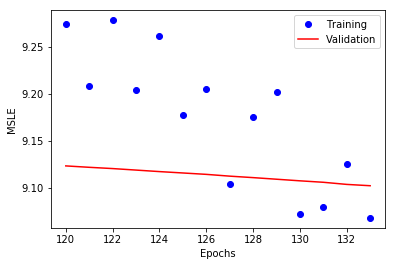

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['mean_squared_logarithmic_error']
val_acc = history.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs[120:], acc[120:], 'bo', label='Training')
plt.plot(epochs[120:], val_acc[120:], 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

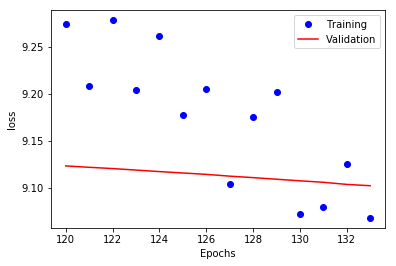

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs[120:], loss[120:], 'bo', label='Training')
plt.plot(epochs[120:], val_loss[120:], 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()